FORTOPOLIO CARIER GENERATOR

In [49]:
# Mengimpor library
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder


from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import permutation_importance

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

In [3]:
# Menghilangkan warning
import warnings
warnings.filterwarnings("ignore")

Sumber data: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

**Informasi data**:<br>
Several constraints were placed on the selection of these instances from a larger database. <br>
In particular, all patients here are females at least 21 years old of Pima Indian heritage.

- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable (0 or 1)

Sources:

(a) Original owners: National Institute of Diabetes and Digestive and
Kidney Diseases

(b) Donor of database: Vincent Sigillito (vgs@aplcen.apl.jhu.edu)<br>
Research Center, RMI Group Leader<br>
Applied Physics Laboratory<br>
The Johns Hopkins University<br>
Johns Hopkins Road<br>
Laurel, MD 20707<br>
(301) 953-6231<br>
(c) Date received: 9 May 1990

### Edit ketiga item di bawah ini:

In [4]:
# Tentukan nama file, target, dan jumlah fold untuk cross validation

# Tulis nama file di sini lengkap dengan extension-nya dalam format string
nama_file = 'E-commerce Customer Behavior.csv'

# Tulis nama variabel targetnya dalam format string
target = 'Satisfaction Level'

# Tulis jumlah fold (integer) untuk cross validation
cv = 5

In [5]:
# Load dataset
df = pd.read_csv(nama_file)

# Melihat tampilan dataset
df.head() # df.head(10)

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [6]:
# Untuk melihat data akhir
df.tail() # df.tail(10)

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
345,446,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
346,447,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
347,448,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
348,449,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral
349,450,Female,43,Chicago,Bronze,515.75,10,3.3,True,49,Unsatisfied


In [7]:
# Kita buang kolom UserID
df.drop(['Customer ID'], axis=1, inplace=True)

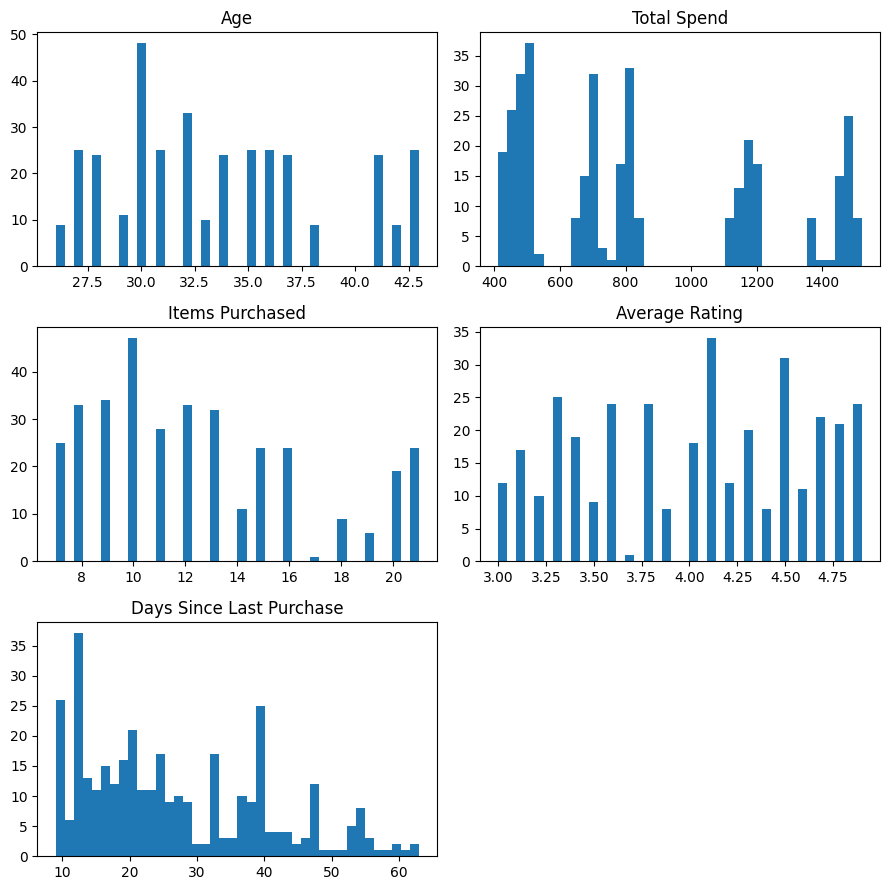

In [8]:
# Untuk visualisasi numerik berupa histogram agar kita bisa melihat apakah ada data yg outlier
# Melakukan plotting histogram untuk melihat distribusi data bertipe numerik (selain kolom 'Id')
df.hist(bins=40, column=[var for var in df.columns if var != 'Id'], grid=False, figsize=(9, 9))
plt.tight_layout()
plt.show()

In [9]:
df.describe()

,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,350.000000,350.000000,350.000000,350.000000,350.000000
mean,33.597143,845.381714,12.600000,4.019143,26.588571
std,4.870882,362.058695,4.155984,0.580539,13.440813
min,26.000000,410.800000,7.000000,3.000000,9.000000
25%,30.000000,502.000000,9.000000,3.500000,15.000000
50%,32.500000,775.200000,12.000000,4.100000,23.000000
75%,37.000000,1160.600000,15.000000,4.500000,38.000000
max,43.000000,1520.100000,21.000000,4.900000,63.000000


In [10]:
# Kita lihat ringkasan data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    350 non-null    object 
 1   Age                       350 non-null    int64  
 2   City                      350 non-null    object 
 3   Membership Type           350 non-null    object 
 4   Total Spend               350 non-null    float64
 5   Items Purchased           350 non-null    int64  
 6   Average Rating            350 non-null    float64
 7   Discount Applied          350 non-null    bool   
 8   Days Since Last Purchase  350 non-null    int64  
 9   Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 25.1+ KB


In [11]:
# Untuk melihat berapa baris yang kosong/NaN
#df.isna().sum()
jumlah = df.isnull().sum()
jumlah

,0
Gender,0
Age,0
City,0
Membership Type,0
Total Spend,0
Items Purchased,0
Average Rating,0
Discount Applied,0
Days Since Last Purchase,0
Satisfaction Level,2


In [12]:
from numbers import Rational
# Mengecek data kosong berdasarkan persen (%)
rata2 = df.isnull().mean()
rata2

,0
Gender,0.000000
Age,0.000000
City,0.000000
Membership Type,0.000000
Total Spend,0.000000
Items Purchased,0.000000
Average Rating,0.000000
Discount Applied,0.000000
Days Since Last Purchase,0.000000
Satisfaction Level,0.005714


In [13]:
informasi = pd.DataFrame({'jumlah': jumlah, 'rata2': rata2})
informasi

,jumlah,rata2
Gender,0,0.000000
Age,0,0.000000
City,0,0.000000
Membership Type,0,0.000000
Total Spend,0,0.000000
Items Purchased,0,0.000000
Average Rating,0,0.000000
Discount Applied,0,0.000000
Days Since Last Purchase,0,0.000000
Satisfaction Level,2,0.005714


In [14]:
# Melihat jumlah nilai unik di setiap kolom
for i in df.columns:
    print(i,'=',len(df[i].unique()))

Gender = 2
Age = 16
City = 6
Membership Type = 3
Total Spend = 76
Items Purchased = 15
Average Rating = 20
Discount Applied = 2
Days Since Last Purchase = 54
Satisfaction Level = 4


In [15]:
# Mengecek data kosong berdasarkan persen (%)
df.isnull().mean()

,0
Gender,0.000000
Age,0.000000
City,0.000000
Membership Type,0.000000
Total Spend,0.000000
Items Purchased,0.000000
Average Rating,0.000000
Discount Applied,0.000000
Days Since Last Purchase,0.000000
Satisfaction Level,0.005714


In [16]:
# Melihat variabel apa saja yang kosong
var_kosong = [var for var in df.columns if df[var].isnull().mean() > 0]
var_kosong

['Satisfaction Level']

In [17]:
# Melihat tipe data di var_kosong
df[var_kosong].dtypes

,0
Satisfaction Level,object


In [18]:
# Melihat tampilan variabel dengan missing values
df[var_kosong].head(10)

,Satisfaction Level
0,Satisfied
1,Neutral
2,Unsatisfied
3,Satisfied
4,Unsatisfied
5,Neutral
6,Satisfied
7,Neutral
8,Unsatisfied
9,Satisfied


In [19]:
# Melihat persentase banyaknya nilai kosong di var_kosong
# Kita mulai dengan menghitung nilai rataan nilai kosong dan menyimpannya sebagai df_kosong
df_kosong = df[var_kosong].isnull().mean()

# Kita bisa menggunakan method isnull() maupun isna(), keduanya sama saja

# Merubahnya menjadi format dataframe (tabel)
df_kosong = pd.DataFrame(df_kosong.reset_index())

# Memberikan nama kolom ke tabel df_kosong
df_kosong.columns = ['variabel', 'proporsi missing']

# Menambah kolom baru untuk melihat tipe data
df_kosong['tipe data'] = [var for var in df[var_kosong].dtypes]

# Mengurutkan tabel mulai dari nilai 'proporsi missing' besar ke kecil
df_kosong.sort_values(by='proporsi missing', ascending=False, inplace=True)

# Melihat tampilan tabel df_kosong
df_kosong


# bisa di lihat di modul 15, menit 39 (Pak Mega)

,variabel,proporsi missing,tipe data
0,Satisfaction Level,0.005714,object


In [20]:
#Melihat total data kosong/baris dan berapa persen %
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Satisfaction Level,2,0.005714
Gender,0,0.000000
Age,0,0.000000
City,0,0.000000
Membership Type,0,0.000000
Total Spend,0,0.000000
Items Purchased,0,0.000000
Average Rating,0,0.000000
Discount Applied,0,0.000000
Days Since Last Purchase,0,0.000000


In [21]:
# Menyeleksi hanya yang memiliki proporsi < 0.05 dan menyimpannya sebagai list var_cca
var_cca = [var for var in var_kosong if df[var].isnull().mean() < 0.05]
var_cca

['Satisfaction Level']

In [22]:
# Menghapus data dengan method dropna() dan menambahkan parameter subset
# Parameter subset diisi dengan list nama kolom yang ingin dihapus nilai kosongnya
# Kita simpan sebagai tabel baru dengan nama df_cca
df_cca = df.dropna(subset=var_cca)

# Jika ingin menghapus semua baris data yang 'missing' tanpa memperdulikan variabelnya (semua yang 'missing' dihapus),
# maka lakukan cara berikut
# df = df.dropna()

# Membandingkan dimensi df (baris, kolom) sebelum dan sesudah CCA
df.shape, df_cca.shape

((350, 10), (348, 10))

In [23]:
# Menghitung proporsi baris data antara data sekarang dibanding data sebelumnya
len(df_cca)/len(df)

0.9942857142857143

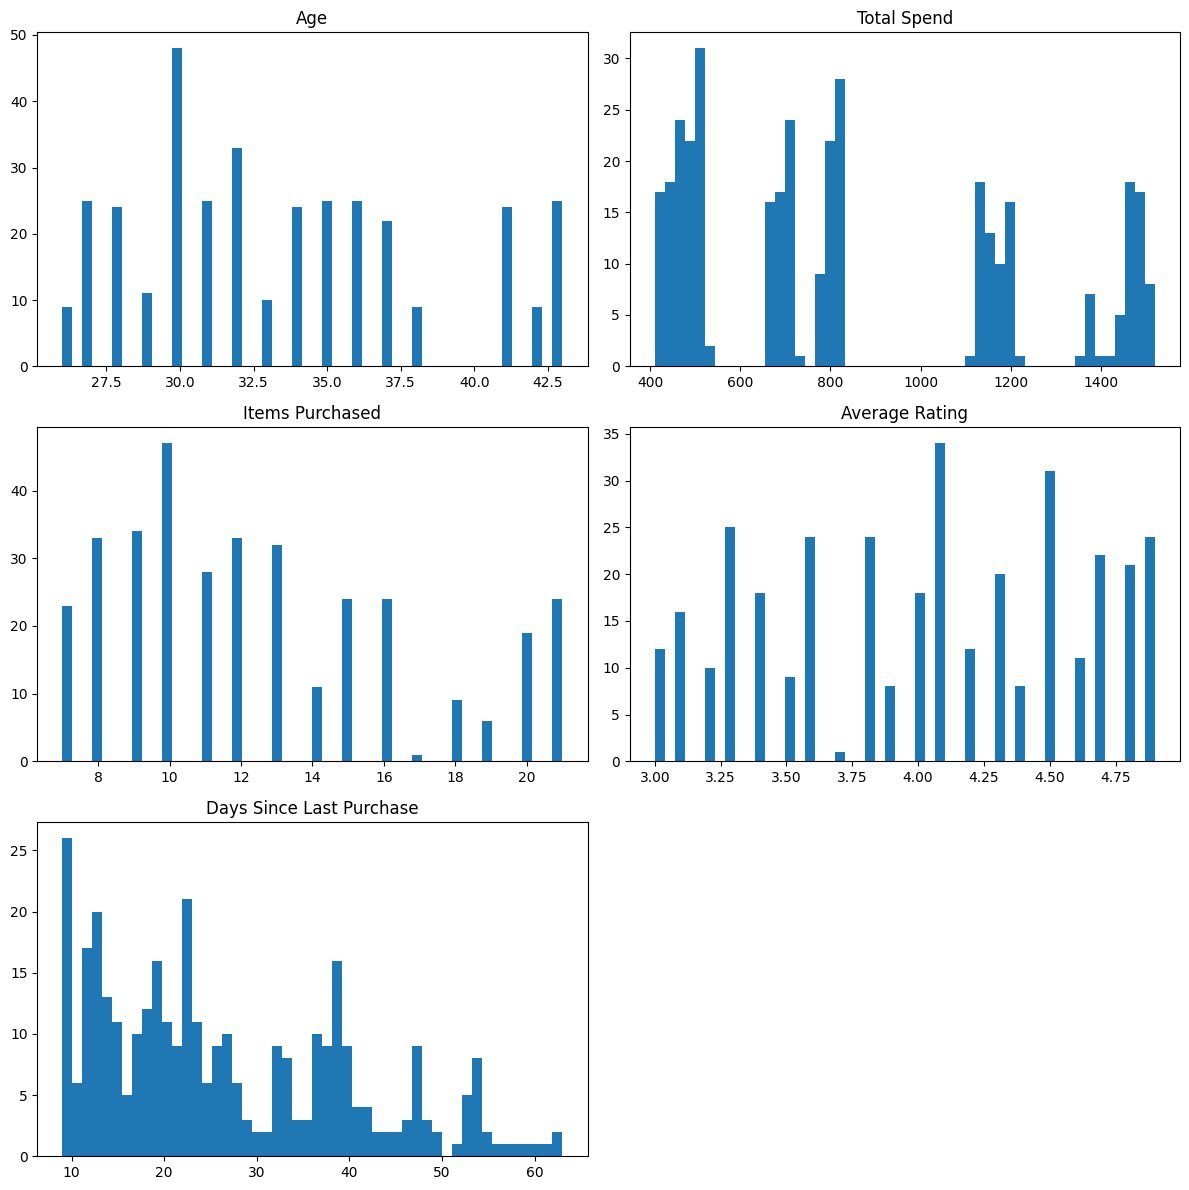

In [24]:
# Melakukan plotting histogram untuk melihat distribusi data bertipe numerik (selain kolom 'Id')
df_cca.hist(bins=50, column=[var for var in df_cca.columns if var != 'Customer ID'], grid=False, figsize=(12, 12)) # hapus != 'Id' jika tidak ada kolom id atau sesuaikan kolom id dgn kolom yg ada
plt.tight_layout()
plt.show()

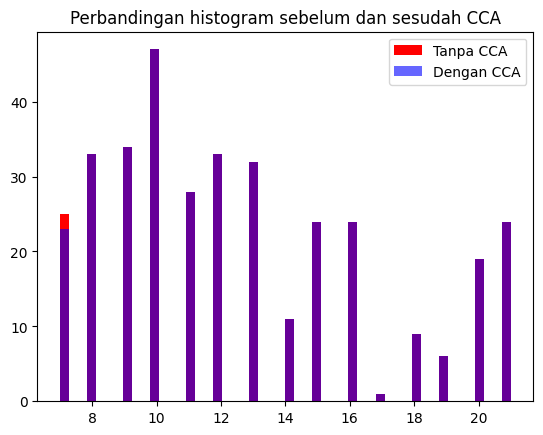

In [25]:
# Menyiapkan template canvas
fig, ax = plt.subplots()

# Data asli
df['Items Purchased'].hist(bins=50, ax=ax, color='red', grid=False)

# Kita gunakan parameter alpha agar histogram df_cca menjadi sedikit transparan
df_cca['Items Purchased'].hist(bins=50, ax=ax, color='blue', alpha=0.6, grid=False)

# Menyiapkan legenda
label = ['Tanpa CCA', 'Dengan CCA']

# membuat judul plot dan menampilkannya
ax.set_title('Perbandingan histogram sebelum dan sesudah CCA')
ax.legend(label, loc=0)
plt.show()

In [26]:
# Menyeleksi hanya yang memiliki proporsi < 0.50 dan menyimpannya sebagai list var_cca
var_cca1 = [var for var in var_kosong if df[var].isnull().mean() < 0.50]
var_cca1

['Satisfaction Level']

In [27]:
df = df_cca.copy()
df

,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied
...,...,...,...,...,...,...,...,...,...,...
345,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
346,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
347,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
348,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral


In [28]:
# Jika ingin menghapus semua baris data yang 'missing' tanpa memperdulikan variabelnya (semua yang 'missing' dihapus),
# maka lakukan cara berikut
#df = df.dropna()axis=1, inplace=True # HATI-HATI, AKAN MEMBUAT SEMUA KOLOM/BARIS KOSONG MENJADI MENGHAPUS 1 BARIS

In [29]:
# Untuk melihat berapa baris yang kosong/NaN
df.isna().sum()
df.isnull().sum()

,0
Gender,0
Age,0
City,0
Membership Type,0
Total Spend,0
Items Purchased,0
Average Rating,0
Discount Applied,0
Days Since Last Purchase,0
Satisfaction Level,0


In [30]:
# Mendefinisikan variabel dependen (y) dan variabel independen (X)
X = df.drop(['Satisfaction Level'], axis=1)
y = df[target]

In [31]:
# Melihat X
X.head(10)

,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase
0,Female,29,New York,Gold,1120.20,14,4.6,True,25
1,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18
2,Female,43,Chicago,Bronze,510.75,9,3.4,True,42
3,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12
4,Male,27,Miami,Silver,720.40,13,4.0,True,55
5,Female,37,Houston,Bronze,440.80,8,3.1,False,22
6,Female,31,New York,Gold,1150.60,15,4.5,True,28
7,Male,35,Los Angeles,Silver,800.90,12,4.2,False,14
8,Female,41,Chicago,Bronze,495.25,10,3.6,True,40
9,Male,28,San Francisco,Gold,1520.10,21,4.8,False,9


In [32]:
# Melihat y
y.head()

,Satisfaction Level
0,Satisfied
1,Neutral
2,Unsatisfied
3,Satisfied
4,Unsatisfied


In [33]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 0)

# Reset indeks dengan looping
for i in [X_train, X_test, y_train, y_test]:
    i.reset_index(drop=True, inplace=True)

# Melihat dimensi training set dan test set
print(X_train.shape, X_test.shape)

(278, 9) (70, 9)


In [34]:
# Membagi kolom menjadi kolom numerik dan kategori
var_kategori = [var for var in df.columns if df[var].dtype=='O' and var!=target]
var_numerik = [var for var in df.columns if df[var].dtype!='O' and var!=target]

# Melihat variabel yang sudah dipisah
print(var_kategori)
print(var_numerik)

['Gender', 'City', 'Membership Type']
['Age', 'Total Spend', 'Items Purchased', 'Average Rating', 'Discount Applied', 'Days Since Last Purchase']


In [35]:
# Membuat Pipeline untuk preprocessing
preprocessor_numerik = Pipeline([
    ('imputasi', SimpleImputer(strategy='median')),
    ('scaling', MinMaxScaler())
])

preprocessor_kategori = Pipeline([
    ('imputasi', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoding', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
])

# Menggabungkan kedua pipeline di atas
preprocessor = ColumnTransformer([
    ('preprocessing numerik', preprocessor_numerik, var_numerik),
    ('preprocessing kategori', preprocessor_kategori, var_kategori)
])

Sebelum kita bandingkan beberapa model, kita coba buat 1 pipeline dengan salah satu model klasifikasi.

Kita coba menggunakan regresi logistik.

In [36]:
# Model regresi logistik
logreg = LogisticRegression()

# Pipeline model regresi logistik
mod_logreg = Pipeline([
    ('preprocessing', preprocessor),
    ('logreg', logreg)
])

In [37]:
# Fitting ke training set
mod_logreg.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('preprocessing numerik',
                                                  Pipeline(steps=[('imputasi',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'Total Spend',
                                                   'Items Purchased',
                                                   'Average Rating',
                                                   'Discount Applied',
                                                   'Days Since Last Purchase']),
                                                 ('preprocessing kategori',
                                                  Pipeline(steps=[('imputasi',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoding',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Gender', 'City',
                                                   'Membership Type'])])),
                ('logreg', LogisticRegression())])

In [52]:
# Mencoba memprediksi test set
pred_test = mod_logreg.predict(X_test)

# Merubahnya ke format Dataframe
pred_test = pd.DataFrame(pred_test, columns=[target])

# Melihat tmapilan y_pred
pred_test.head()

,Satisfaction Level
0,Satisfied
1,Unsatisfied
2,Unsatisfied
3,Satisfied
4,Satisfied


In [53]:
# Membuat Confusion Matrix
cm_logreg = confusion_matrix(y_test, pred_test)
cm_logreg

array([[23,  0,  0],
       [ 3, 20,  0],
       [ 0,  0, 24]])

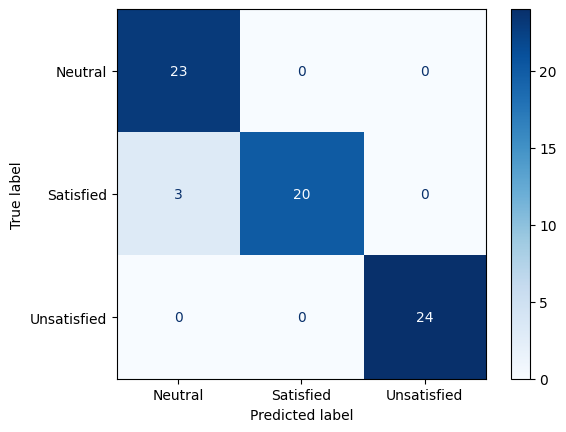

In [54]:
# Melihat confusion matrix dengan ConfusionMatrixDisplay()
vis_cm = ConfusionMatrixDisplay(confusion_matrix = cm_logreg,
                                display_labels = mod_logreg.classes_)
vis_cm.plot(cmap=plt.cm.Blues); # cm adalah singkatan dari colormap

In [55]:
# Melihat ringkasan evaluasi
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

     Neutral       0.88      1.00      0.94        23
   Satisfied       1.00      0.87      0.93        23
 Unsatisfied       1.00      1.00      1.00        24

    accuracy                           0.96        70
   macro avg       0.96      0.96      0.96        70
weighted avg       0.96      0.96      0.96        70



In [60]:
# Menghitung metrics klasifikasi satu per satu
print('Nilai akurasi: {:.2f}'.format(accuracy_score(y_test, pred_test)))
print('Nilai presisi (macro): {:.2f}'.format(precision_score(y_test, pred_test, average='macro')))
print('Nilai recall (macro): {:.2f}'.format(recall_score(y_test, pred_test, average='macro')))
print('Nilai f1-score (macro): {:.2f}'.format(f1_score(y_test, pred_test, average='macro')))


Nilai akurasi: 0.96
Nilai presisi (macro): 0.96
Nilai recall (macro): 0.96
Nilai f1-score (macro): 0.96


Proses pembuatan pipeline berhasil dan tidak memunculkan *error* , sekarang kita akan mendefinisikan beberapa model kemudian diikuti dengan *hyperparameter tuning*.

<br>

<br><hr><br>

## 1. Pipeline dan Cross Validation

### 1.1 *Logistic Regression*

Dokumentasi: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
# Model regresi logistik
logreg = LogisticRegression(random_state=0)

# Pipeline model regresi logistik
mod_logreg = Pipeline([
    ('preprocessing', preprocessor),
    ('logreg', logreg)
])

# Hyperparameter tuning Logistic Regression
param_logreg = {'logreg__penalty': ['l2'],
                'logreg__C': [0.01, 0.09, 0.1, 0.125, 1, 1.5],
                'logreg__solver' : ['liblinear', 'newton-cg', 'sag', 'saga', 'lbfgs']
               }

<br>

### 1.2 Stochastic Gradient Descent (SGD)

Dokumentasi: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

In [ ]:
# Model sgd
sgd = SGDClassifier(loss='log_loss', random_state=0)

# Pipeline model sgd
mod_sgd = Pipeline([
    ('preprocessing', preprocessor),
    ('sgd', sgd)
])

# Hyperparameter tuning sgd
param_sgd = {'sgd__loss': ['log_loss', 'modified_huber', 'squared_hinge', 'perceptron'],
             'sgd__penalty': ['l2', 'l1', 'elasticnet']
             }

<br>

### 1.3 *Decision Tree*

Dokumentasi: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [ ]:
# Model DT
dt = DecisionTreeClassifier(random_state= 0)

# Pipeline model DT
mod_dt = Pipeline([
    ('preprocessing', preprocessor),
    ('dt', dt)
])

# Hyperparameter tuning DT
param_dt = {'dt__min_samples_split': [2, 3, 4],
            'dt__min_samples_leaf': [1, 2, 3, 4],
            'dt__criterion': ['gini', 'entropy','log_loss'],
            'dt__max_depth':[1,2,3,4]
           }

<br>

### 1.4 SVM

Dokumentasi: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [ ]:
# Model SVM
svm = SVC(kernel = 'rbf', probability=True, random_state = 0)

# Pipeline model SVM
mod_svm = Pipeline([
    ('preprocessing', preprocessor),
    ('svm', svm)
])

# Hyperparameter tuning SVM
param_svm = {'svm__C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 1],
             'svm__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
             'svm__degree': [1, 2, 3, 4, 5],
             'svm__kernel': ['linear', 'poly', 'rbf', 'sigmoid']
            }

<br>

### 1.5 KNN

Dokumentasi: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [ ]:
# Model KNN
knn = KNeighborsClassifier()

# Pipeline model KNN
mod_knn = Pipeline([
    ('preprocessing', preprocessor),
    ('knn', knn),
])

# Hyperparameter tuning KNN
param_knn = {'knn__n_neighbors': [1, 2, 3, 4, 5],
             'knn__weights': ['uniform', 'distance'],
             'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
            }

<br>

### 1.6 Gaussian Process Classifier (GPC)

Dokumentasi: https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessClassifier.html

In [ ]:
# Model GPC
gpc = GaussianProcessClassifier(random_state=0)

# Pipeline model GPC
mod_gpc = Pipeline([
    ('preprocessing', preprocessor),
    ('gpc', gpc),
])

# Hyperparameter tuning GPC
param_gpc = {'gpc__max_iter_predict': [100, 200, 300],
             'gpc__n_restarts_optimizer': [0, 5, 10]
            }

<br>

### 1.7 Naive Bayes

Dokumentasi: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

In [ ]:
# Model Naive Bayes
naive = GaussianNB()

# Pipeline model Naive Bayes
mod_naive = Pipeline([
    ('preprocessing', preprocessor),
    ('naive', naive),
])

# Hyperparameter tuning Naive Bayes
param_naive = {'naive__var_smoothing': np.logspace(0,-9, num=100)}

<br>

### 1.8 *Random Forest*

Dokumentasi: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [ ]:
# Model RF
rf = RandomForestClassifier(random_state=0, n_jobs=-1)

# Pipeline model RF
mod_rf = Pipeline([
    ('preprocessing', preprocessor),
    ('rf', rf),
])

# Hyperparameter tuning RF
param_rf = {'rf__n_estimators': [200, 250, 300],
            'rf__criterion': ['gini', 'entropy', 'log_loss'],
            'rf__max_depth': [1, 2, 3, 4],
            'rf__min_samples_split': [2, 3],
            'rf__min_samples_leaf': [1, 2, 3],
            'rf__warm_start': [True]
            }

<br>

### 1.9 AdaBoost

Dokumentasi: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

In [ ]:
# Model AdaBoost
ada = AdaBoostClassifier(random_state=0)

# Pipeline model AdaBoost
mod_ada = Pipeline([
    ('preprocessing', preprocessor),
    ('ada', ada),
])

# Hyperparameter tuning AdaBoost
param_ada = {'ada__n_estimators': [10, 20, 30, 50, 70],
             'ada__learning_rate': [0.3, 0.4, 0.5, 1, 1.1],
             'ada__algorithm': ['SAMME', 'SAMME.R'],
             }

<br>

### 1.10 Gradient Boosting

Dokumentasi: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

In [ ]:
# Model regresi XGBoost
gb = GradientBoostingClassifier(random_state=0)

# Pipeline model regresi XGBoost
mod_gb = Pipeline([
    ('preprocessing', preprocessor),
    ('gb',gb)
])

# Hyperparameter tuning regresi XGBoost
param_gb = {'gb__loss': ['log_loss', 'exponential'],
            'gb__learning_rate': [0.1, 0.3, 0.4, 0.5, 1, 1.1],
            'gb__n_estimators': [10, 20, 30, 50, 70]}

<br>

### 1.11 XGBoost

Dokumentasi: https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier

In [ ]:
# Model regresi LightGBM
xgb = XGBClassifier(eval_metric='logloss', random_state=0)

# pipeline model
mod_xgb = Pipeline([
    ('preprocessing', preprocessor),
    ('xgb', xgb),
])

# hyperparameter tuning
param_xgb = {'xgb__learning_rate': [0.05, 0.1, 0.2],
             'xgb__max_depth': [5, 7, 9],
             'xgb__gamma': [0, 0.1, 0.2]
            }

<br>

### 1.12 Multi Layer Perceptron (MLP)

Dokumentasi: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [ ]:
# Model regresi MLP
mlp = MLPClassifier(random_state=0, max_iter=5000)

# Pipeline model regresi MLP
mod_mlp = Pipeline([
    ('preprocessing', preprocessor),
    ('mlp', mlp)
    ])

# Hyperparameter tuning regresi MLP
param_mlp = {'mlp__hidden_layer_sizes': [(100,),(200,),(300,),(400,)],
             'mlp__activation':['identity', 'logistic', 'tanh', 'relu'],
             'mlp__solver':['sgd', 'adam']
             }

<br>

Sekarang saatnya melakukan model *training* dengan *cross validation*.

Daftar metrik yang bisa dipakai menggunakan perintah <code>cross_val_score()</code>:<br>
https://scikit-learn.org/stable/modules/model_evaluation.html

In [ ]:
# Model training dengan cross validation
daftar_model = [mod_logreg, mod_sgd, mod_dt, mod_svm, mod_knn, mod_gpc, mod_naive, mod_rf, mod_ada, mod_gb, mod_xgb, mod_mlp]
daftar_nama_model = ['logreg', 'sgd', 'dt', 'svm', 'knn', 'gpc', 'naive', 'rf', 'ada', 'gb', 'xgb', 'mlp']
mean_akurasi = []
mean_auc = []
std_akurasi = []
std_auc = []
test_score_akurasi = []
test_score_auc = []

# Kita setting agar proses cross validasi dilakukan dengan sama rata (stratified) untuk pembagian kategori labelnya
skf = StratifiedKFold(n_splits=cv, random_state=0, shuffle=True)
cv = skf

# Looping untuk setiap model yang sudah disiapkan
for i in daftar_model:

    # Melakukan cross validation dan menggunakan kriteria berdasarkan skor akurasi
    cv_akurasi = cross_val_score(i, X_train, y_train, cv=cv, scoring='accuracy', verbose=1, n_jobs=-1)  # kita kalikan dengan -1 karena scoring menggunakan nilai negatif
    cv_auc = cross_val_score(i, X_train, y_train, cv=cv, scoring='roc_auc', verbose=1, n_jobs=-1)

    # Menghitung nilai rata-rata akurasi dan menambahkannya ke variabel mean_akurasi
    mean_akurasi.append(round(cv_akurasi.mean(),2))   # round(nilai,2) untuk membulatkan nilai 2 angka di belakang koma
    mean_auc.append(round(cv_auc.mean(),2))

    # Menghitung nilai standar deviasi akurasi dan menambahkannya ke variabel std_akurasi
    std_akurasi.append(round(cv_akurasi.std(),2))
    std_auc.append(round(cv_auc.std(),2))

    # Melakukan fitting training set kemudian melakukan prediksi  di test set
    i.fit(X_train, y_train)
    i_predict = i.predict(X_test)
    i_predict_proba = i.predict_proba(X_test)[:,1]

    # Menghitung nilai rata-rata akurasi di test set dan menambahkannya ke variabel test_score_akurasi
    test_score_akurasi.append(round(accuracy_score(y_test, i_predict),2))
    test_score_auc.append(round(roc_auc_score(y_test, i_predict_proba),2))

In [ ]:
# Membuat DataFrame
cv_akurasi = pd.DataFrame({'model':daftar_nama_model, 'Train_Mean':mean_akurasi, 'std':std_akurasi, 'Test_Score':test_score_akurasi})
cv_auc = pd.DataFrame({'model':daftar_nama_model, 'Train_Mean':mean_auc, 'std':std_auc, 'Test_Score':test_score_auc})

In [ ]:
# Melihat hasil cross validation berdasarkan akurasi
cv_akurasi

In [ ]:
# Melihat hasil cross validation berdasarkan akurasi
cv_auc

In [ ]:
# Mengurutkan skor dari kecil ke besar berdasarkan skor akurasi
cv_akurasi_urut = cv_akurasi.sort_values(by=['Train_Mean', 'Test_Score'], ascending=False,  ignore_index=True)
cv_akurasi_urut

In [ ]:
# Mengurutkan skor dari kecil ke besar berdasarkan skor AUC
cv_auc_urut = cv_auc.sort_values(by=['Train_Mean', 'Test_Score'], ascending=False,  ignore_index=True)
cv_auc_urut

<br>

## 2. Hyperparameter Tuning

Kita sudah melihat bahwa model gb yang terbaik dibanding semua model, berdasarkan skor akurasi yang tinggi dan skor auc yang tinggi pula.

Namun semua model yang dibandingkan menggunakan *hyperparameter* default.

Kita akan coba membandingkan kembali semua model tersebut dengan *setting*an *hyperparameter* yang sudah kita *tuning* dengan menggunakan <code>GridSearchCV()</code>.

<code>GridSearchCV()</code> akan mengevaluasi semua settingan dari *hyperparameter* yang sudah disiapkan dan mempertahankan *setting*-an terbaik sampai selesai (setelah mencoba semua kombinasi *hyperparameter* dan semua *fold* di *cross validation*).

In [ ]:
# Model training dengan GridSearchCV
daftar_model = [mod_logreg, mod_sgd, mod_dt, mod_svm, mod_knn, mod_gpc, mod_naive, mod_rf, mod_ada, mod_gb, mod_xgb, mod_mlp]
daftar_nama_model = ['logreg', 'sgd', 'dt', 'svm', 'knn', 'gpc', 'naive', 'rf', 'ada', 'gb', 'xgb', 'mlp']
daftar_param_model = [param_logreg, param_sgd, param_dt, param_svm, param_knn,
                      param_gpc, param_naive, param_rf, param_ada, param_gb, param_xgb, param_mlp]


# Nilai yang akan diisikan
akurasi_tuning = []
akurasi_tuning_test = []
auc_tuning = []
auc_tuning_test = []
best_param = []
best_estimator = []

for i in range(len(daftar_model)):

    # Menjalankan GridSearchCV
    model_grid_cv = GridSearchCV(
        daftar_model[i],
        daftar_param_model[i],
        cv=cv,
        scoring='accuracy',  # nilai akurasi digunakan sebagai dasar penentuan peringkat parameter terbaik dan parameter scoring ini bisa diganti yang lain
        verbose=1,
        n_jobs=-1
        )

    # Fitting ke training set
    model_grid_cv.fit(X_train,y_train)

    # Mencoba memprediksi training dan test set setelah fitting di training set, kemudian dikemas dalam format DataFrame
    pred_train = pd.DataFrame(model_grid_cv.predict(X_train), columns=[target])
    pred_test = pd.DataFrame(model_grid_cv.predict(X_test), columns=[target])

    # Mencatat skor akurasi training dan test set
    akurasi_tuning.append(accuracy_score(y_train, pred_train))
    akurasi_tuning_test.append(accuracy_score(y_test, pred_test))

    # Mencatat skor AUC training dan test set
    auc_tuning.append(roc_auc_score(y_train, model_grid_cv.predict_proba(X_train)[:,1]))
    auc_tuning_test.append(roc_auc_score(y_test, model_grid_cv.predict_proba(X_test)[:,1]))

    # Mencatat parameter terbaik di setiap model
    best_param.append(model_grid_cv.best_params_)

    # Merekam settingan modelnya
    best_estimator.append(model_grid_cv.best_estimator_)

In [ ]:
# Membuat DataFrame sekaligus kita urutkan
grid_akurasi = pd.DataFrame({'model':daftar_nama_model, 'Training':akurasi_tuning, 'Testing':akurasi_tuning_test})
grid_akurasi_urut = grid_akurasi.sort_values(by='Testing', ascending=False,  ignore_index=True)

grid_auc = pd.DataFrame({'model':daftar_nama_model, 'Training':auc_tuning, 'Testing':auc_tuning_test})
grid_auc_urut = grid_auc.sort_values(by='Testing', ascending=False, ignore_index=True)

Kita pilih model terbaik berdasarkan performanya di *Test Set*.

In [ ]:
# Melihat performa tuning berdasarkan akurasi
grid_akurasi_urut

Perlu diperhatikan bahwa skor akurasi di kolom *Training* di atas adalah skor akurasi rata-rata dari *cross validation*. Begitu juga untuk nilai akurasi di kolom *Testing*.

In [ ]:
# Melihat performa tuning berdasarkan AUC
grid_auc_urut

In [ ]:
# Parameter terbaik dari model terbaik
grid_param = pd.DataFrame({'model':daftar_nama_model, 'Param':best_param})
grid_param

In [ ]:
# Estimator terbaik dari model terbaik
grid_estimator = pd.DataFrame({'model':daftar_nama_model, 'Param':best_estimator})
grid_estimator

In [ ]:
# Kita gabungkan semua sebagai 'model_best'
model_best_estimator = pd.DataFrame({'model':daftar_nama_model, 'Param':best_estimator, 'Testing':auc_tuning_test})
model_best_estimator = model_best_estimator.sort_values(by='Testing', ascending=False, ignore_index=True)
model_best_estimator

<br>

## 3. Menggunakan Model Terbaik

Sekarang kita bisa menggunakan modelnya dari <code>model_best</code>, di mana jika kita ingin memilih model terbaik maka pilih urutan pertama.

Sehingga jika kita ingin menggunakan model terbaik (indeks ke-0), maka pilih <code>model_best['Param'][0]</code>.

Sekarang kita harus melakukan *fitting* akhir di mana kita akan mentraining parameter dari model terbaik terhadap dataset utuh (gabungan *training set* dan *test set*).

In [ ]:
# Fitting ke dataset utuh
model_final = model_best_estimator['Param'][0].fit(X,y)

Melihat *feature importance* dari model terbaik.

<br>

## 4. Menyimpan Model

Sekarang kita akan menyimpan modelnya untuk nanti bisa dipakai dan di*deploy*.

In [ ]:
# Library untuk menyimpan model
import pickle

In [ ]:
# Menyimpan model dengan nama 'model_regresi_terbaik.pkl'
pickle.dump(model_final, open('model_klasifikasi_terbaik.pkl', 'wb'))

Sekarang kita akan coba memprediksi X_test menggunakan model yang sudah kita simpan.

In [ ]:
# Load lagi model yang sudah disimpan dan buka sebagai 'best_model'
best_model = pickle.load(open('model_klasifikasi_terbaik.pkl', 'rb'))

In [ ]:
# Mencoba melakukan prediksi X_test
prediksi = best_model.predict(X_test)

# Melihat hasil prediksi
prediksi

In [ ]:
# Merubah dalam format DataFrame
prediksi = pd.DataFrame(prediksi, columns=['Beli'])
prediksi.head(15)

<br>

## 5. Feature Importance

Kita bisa melihat feature apa saja yang paling berpengaruh atau sering disebut dengan istilah *feature importance*.

In [ ]:
# Menyiapkan tabel untuk nanti diiterasi satu per satu
model_ft = model_best_estimator.set_index('model')
model_ft

<br>

### 5.1 Model Linear Regression

**Cara pertama**

In [ ]:
# Feature importance menggunakan logistic regression coefficient
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': np.abs(mod_logreg[1].coef_[0])
})
importances = importances.sort_values(by='Importance', ascending=False)

# Visualisasi Feature Importance menggunakan logistic regression
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='pink')
plt.title('Feature importances obtained from coefficients', size=15)
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

**Cara kedua**

In [ ]:
avg_importance = np.mean(np.abs(mod_logreg[1].coef_), axis=0)
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': avg_importance})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))
plt.show()

<br>

### 5.2 Model SGD

In [ ]:
# Melihat pipeline model lasso
nama_model = model_ft.loc['sgd','Param']['sgd']
nama_model

In [ ]:
# Fitting menggunakan shap
explainer = shap.Explainer(model_final.predict, X_test)
shap_values = explainer(X_test)

In [ ]:
# Plotting barplot
shap.plots.bar(shap_values)

In [ ]:
# Ringkasan dan penjelasan
shap.summary_plot(shap_values)

<br>

### 5.3 Model Decision Tree

In [ ]:
# Melihat pipeline model
nama_model = model_ft.loc['dt','Param']['dt']
nama_model

In [ ]:
# Menghitung importances
modelku = model_ft.loc['dt','Param']
nama_feature = []
fitur = modelku['preprocessing'].get_feature_names_out()
for i in fitur:
    if 'numerik' in i:
        nama_feature.append(i.replace('preprocessing numerik__',''))
    else:
        nama_feature.append(i.replace('preprocessing kategori__',''))

importances = nama_model.feature_importances_
importances = pd.Series(importances, index=nama_feature)
importances

In [ ]:
# Melakukan plotting
fig, ax = plt.subplots(figsize = (7,5))
importances.sort_values(ascending=False).plot.bar(ax=ax)
ax.set_title('Plot Feature Importance Setiap Feature')
ax.set_ylabel('Mean decrease impurity')
fig.tight_layout()

<br>

### 5.4 Model SVM

In [ ]:
# Melihat pipeline model
nama_model = model_ft.loc['svm','Param']['svm']
nama_model

In [ ]:
# Menghitung importances
modelku = model_ft.loc['svm','Param']
nama_feature = []
fitur = modelku['preprocessing'].get_feature_names_out()
for i in fitur:
    if 'numerik' in i:
        nama_feature.append(i.replace('preprocessing numerik__',''))
    else:
        nama_feature.append(i.replace('preprocessing kategori__',''))
hasil = permutation_importance(nama_model, X, y, scoring='neg_mean_squared_error', random_state=0)
#importances = hasil.importances_mean
#importances = pd.Series(importances, index=nama_feature)
#importances

In [ ]:
# Melakukan plotting
fig, ax = plt.subplots(figsize = (7,5))
importances.sort_values(ascending=False).plot.bar(ax=ax)
ax.set_title('Plot Feature Importance Setiap Feature')
ax.set_ylabel('Permutation Importance')
fig.tight_layout()

Permutation feature importance adalah teknik inspeksi model yang mengukur kontribusi setiap fitur terhadap performa statistik model yang sudah dilatih pada dataset tabular. Teknik ini sangat berguna untuk estimator yang non-linear atau tidak transparan, dan melibatkan pengacakan nilai-nilai dari satu fitur secara acak, kemudian mengamati penurunan skor model yang dihasilkan. Dengan memutuskan hubungan antara fitur dan target, kita dapat menentukan seberapa besar model bergantung pada fitur tersebut

<br>

### 5.5 Model KNN

In [ ]:
# Melihat pipeline model
nama_model = model_ft.loc['knn','Param']['knn']
nama_model

In [ ]:
# Fitting menggunakan shap
explainer = shap.Explainer(nama_model.predict, X_test)
shap_values = explainer(X_test)

In [ ]:
# Plotting barplot
shap.plots.bar(shap_values)

Di sini, fitur-fitur diurutkan dari pengaruh tertinggi hingga terendah terhadap prediksi. <br>
Pengurutan ini berdasarkan nilai SHAP absolut, sehingga tidak masalah apakah fitur tersebut mempengaruhi prediksi secara positif atau negatif

In [ ]:
# Ringkasan dan penjelasan
shap.summary_plot(shap_values)

<br>

### 5.6 Model GPC

In [ ]:
# Melihat pipeline model
nama_model = model_ft.loc['gpc','Param']['gpc']
nama_model

In [ ]:
# Fitting menggunakan shap
explainer = shap.Explainer(nama_model.predict, X_test)
shap_values = explainer(X_test)

In [ ]:
# Plotting barplot
shap.plots.bar(shap_values)

In [ ]:
# Ringkasan dan penjelasan
shap.summary_plot(shap_values)

<br>

### 5.7 Model Naive Bayes

In [ ]:
# Melihat pipeline model
nama_model = model_ft.loc['naive','Param']['naive']
nama_model

In [ ]:
# Fitting menggunakan shap
explainer = shap.Explainer(nama_model.predict, X_test)
shap_values = explainer(X_test)

In [ ]:
# Plotting barplot
shap.plots.bar(shap_values)

In [ ]:
# Ringkasan dan penjelasan
shap.summary_plot(shap_values)

<br>

### 5.8 Model Random Forest

In [ ]:
# Melihat pipeline model
nama_model = model_ft.loc['rf','Param']['rf']
nama_model

In [ ]:
# Menghitung importances
modelku = model_ft.loc['rf','Param']
nama_feature = []
fitur = modelku['preprocessing'].get_feature_names_out()
for i in fitur:
    if 'numerik' in i:
        nama_feature.append(i.replace('preprocessing numerik__',''))
    else:
        nama_feature.append(i.replace('preprocessing kategori__',''))

importances = nama_model.feature_importances_
importances = pd.Series(importances, index=nama_feature)
importances

In [ ]:
# Melakukan plotting
fig, ax = plt.subplots(figsize = (7,5))
importances.sort_values(ascending=False).plot.bar(ax=ax)
ax.set_title('Plot Feature Importance Setiap Feature')
ax.set_ylabel('Mean decrease impurity')
fig.tight_layout()

<br>

### 5.9 Model Ada Boost

In [ ]:
# Melihat pipeline model
nama_model = model_ft.loc['ada','Param']['ada']
nama_model

In [ ]:
# Menghitung importances
modelku = model_ft.loc['ada','Param']
nama_feature = []
fitur = modelku['preprocessing'].get_feature_names_out()
for i in fitur:
    if 'numerik' in i:
        nama_feature.append(i.replace('preprocessing numerik__',''))
    else:
        nama_feature.append(i.replace('preprocessing kategori__',''))

importances = nama_model.feature_importances_
importances = pd.Series(importances, index=nama_feature)
importances

In [ ]:
# Melakukan plotting
fig, ax = plt.subplots(figsize = (7,5))
importances.sort_values(ascending=False).plot.bar(ax=ax)
ax.set_title('Plot Feature Importance Setiap Feature')
ax.set_ylabel('Mean decrease impurity')
fig.tight_layout()

<br>

### 5.10 Model Gradient Boosting

In [ ]:
# Melihat pipeline model
nama_model = model_ft.loc['gb','Param']['gb']
nama_model

In [ ]:
# Menghitung importances
modelku = model_ft.loc['gb','Param']
nama_feature = []
fitur = modelku['preprocessing'].get_feature_names_out()
for i in fitur:
    if 'numerik' in i:
        nama_feature.append(i.replace('preprocessing numerik__',''))
    else:
        nama_feature.append(i.replace('preprocessing kategori__',''))

importances = nama_model.feature_importances_
importances = pd.Series(importances, index=nama_feature)
importances

In [ ]:
# Melakukan plotting
fig, ax = plt.subplots(figsize = (7,5))
importances.sort_values(ascending=False).plot.bar(ax=ax)
ax.set_title('Plot Feature Importance Setiap Feature')
ax.set_ylabel('Mean decrease impurity')
fig.tight_layout()

<br>

### 5.11 Model XGBoost

In [ ]:
# Melihat pipeline model
nama_model = model_ft.loc['xgb','Param']['xgb']
nama_model

In [ ]:
# Menghitung importances
modelku = model_ft.loc['xgb','Param']
nama_feature = []
fitur = modelku['preprocessing'].get_feature_names_out()
for i in fitur:
    if 'numerik' in i:
        nama_feature.append(i.replace('preprocessing numerik__',''))
    else:
        nama_feature.append(i.replace('preprocessing kategori__',''))

importances = nama_model.feature_importances_
importances = pd.Series(importances, index=nama_feature)
importances

In [ ]:
# Melakukan plotting
fig, ax = plt.subplots(figsize = (7,5))
importances.sort_values(ascending=False).plot.bar(ax=ax)
ax.set_title('Plot Feature Importance Setiap Feature')
ax.set_ylabel('Mean decrease impurity')
fig.tight_layout()

<br>

<br>

### 5.12 Model Multi Layer Perceptron

In [ ]:
# Melihat pipeline model
nama_model = model_ft.loc['mlp','Param']['mlp']
nama_model

In [ ]:
# Fitting menggunakan shap
explainer = shap.Explainer(nama_model.predict, X_test)
shap_values = explainer(X_test)

In [ ]:
# Plotting barplot
shap.plots.bar(shap_values)

In [ ]:
# Ringkasan dan penjelasan
shap.summary_plot(shap_values)